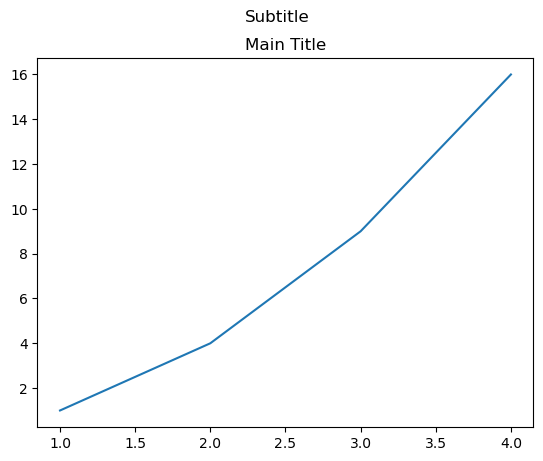

In [4]:
import matplotlib.pyplot as plt

# Your plot code
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])

# Set title and subtitle
plt.title('Main Title')
plt.suptitle('Subtitle')

plt.show()
